In [23]:
import pandas as pd

posts = pd.read_csv("../Data/Reddit_AAPL_Posts.csv", index_col='index')
comments = pd.read_csv("../Data/Reddit_AAPL_Comments.csv", index_col='index')

## Preprocesado de Posts

In [29]:
# 1. Convertir la columna 'created_utc' a tipo datetime
posts['created_utc'] = pd.to_datetime(posts['created_utc'], unit='s')

# 2. Nos quedamos solo con las columnas necesarias
posts = posts[[ "id", "created_utc","title", "selftext"]]

# 3. Eliminar valores nulos o rellenarlos
posts = posts.dropna(subset=['title'])

# 4. Verificación final
posts

,id,created_utc,title,selftext
index,,,,
0,qjx7sk,2021-10-31 19:48:40,why is aapl included in dividend etfs?,I have created a package of dividend stocks by...
1,qjx3kk,2021-10-31 19:42:55,why aapl deserves $200+ and a 35+ pe,The market has now gifted MSFT (a great but in...
3,qjvo1l,2021-10-31 18:33:50,sell a few aapl shares and buy crm?,I've got about 5.5% AAPL and 11.1% MSFT. I'm ...
4,qjtshr,2021-10-31 17:02:20,is $aapl able to grow much more?,I’m a broke college student but I have enough ...
19,qihwwl,2021-10-29 17:28:02,"hot stock s-- gree, auph, x, qs, rkt, bkkt, mc...","GREE, AUPH, X, QS, RKT, BKKT, MCMJ, GEVO, SBUX..."
...,...,...,...,...
15469,5c8grj,2016-11-10 15:42:36,anyone else short aapl after their earnings lo...,[removed]
15472,5buvbp,2016-11-08 18:13:04,i have 30 shares of aapl and 20 shares of tsla...,[removed]
15474,5bat5x,2016-11-05 16:46:28,apple's eddy cue sells $37.5m in aapl stock,[deleted]


## Preprocesado de Comentarios

In [27]:
comments

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
index,,,,,,,,,,
0,comment,hitr97r,2qjfk,stocks,False,1635724579,https://old.reddit.com/r/stocks/comments/qjvo1...,I own all 3. Don't sell AAPL.,0.0000,1
1,comment,hitq83x,2qjfk,stocks,False,1635724042,https://old.reddit.com/r/stocks/comments/qj07j...,I believe TSLA want to be like AAPL: part hard...,-0.2500,2
2,comment,hitp3wy,3qd6hq,millennialbets,False,1635723463,https://old.reddit.com/r/MillennialBets/commen...,**[Recent News for BABA-](https://www.reddit.c...,0.9422,1
3,comment,hitnu8x,2qsbv,dividends,False,1635722829,https://old.reddit.com/r/dividends/comments/qj...,"O, AAPL, NKE",NaN,1
4,comment,hitmll9,2qjfk,stocks,False,1635722214,https://old.reddit.com/r/stocks/comments/qjvo1...,I have both. CRM has had better revenue and ea...,0.7896,1
...,...,...,...,...,...,...,...,...,...,...
297528,comment,d9gq1rr,2th52,wallstreetbets,False,1478004756,https://old.reddit.com/r/wallstreetbets/commen...,#Good morning traders of the r/wallstreetbets ...,0.9852,1
297529,comment,d9gmf6u,2qgzg,business,False,1477995175,https://old.reddit.com/r/business/comments/5ac...,"AAPL is a buy at any dips, Warren Buffet bough...",0.4215,3
297530,comment,d9gjouk,2qh1f,apple,False,1477984867,https://old.reddit.com/r/apple/comments/5accfe...,You must be new here.\n\nEveryone is disappoin...,0.5267,-1


In [43]:
# 1. Convertir la columna 'created_utc' a tipo datetime
comments['created_utc'] = pd.to_datetime(comments['created_utc'])

# 2. Nos quedamos solo con las columnas necesarias
comments = comments[['id', 'created_utc', 'body']]

# 3. Eliminar valores nulos o rellenarlos
comments = comments.dropna(subset=["body"])

# 4. Verificación final
comments

,id,created_utc,body
index,,,
0,hitr97r,2021-10-31,I own all 3. Don't sell AAPL.
1,hitq83x,2021-10-31,I believe TSLA want to be like AAPL: part hard...
2,hitp3wy,2021-10-31,**[Recent News for BABA-](https://www.reddit.c...
3,hitnu8x,2021-10-31,"O, AAPL, NKE"
4,hitmll9,2021-10-31,I have both. CRM has had better revenue and ea...
...,...,...,...
297528,d9gq1rr,2016-11-01,#Good morning traders of the r/wallstreetbets ...
297529,d9gmf6u,2016-11-01,"AAPL is a buy at any dips, Warren Buffet bough..."
297530,d9gjouk,2016-11-01,You must be new here.\n\nEveryone is disappoin...


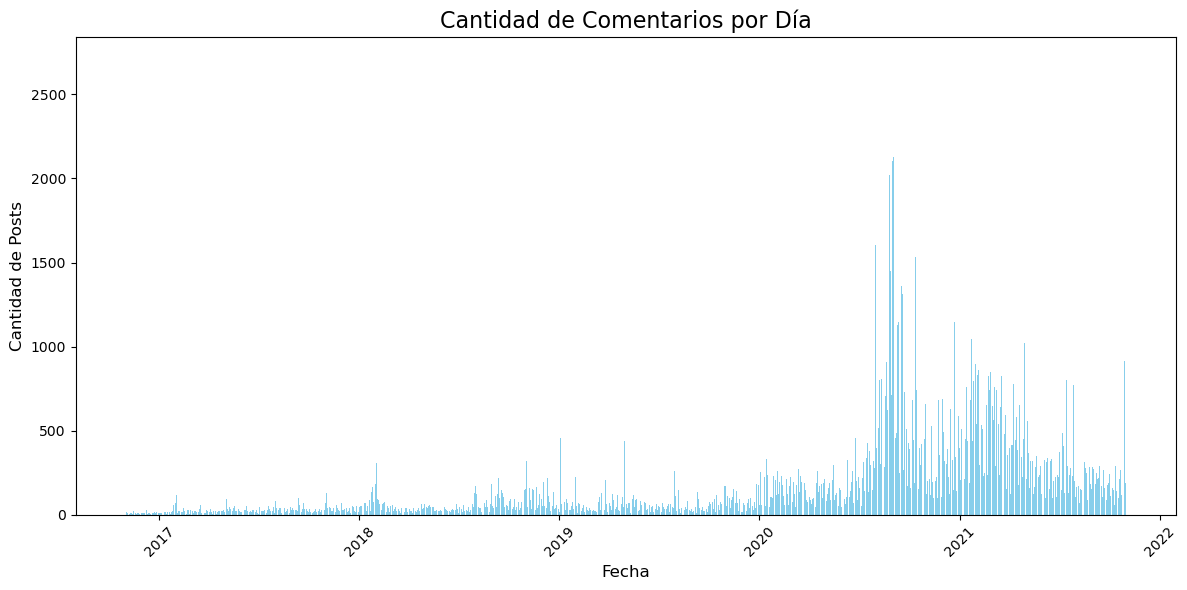

In [44]:
import matplotlib.pyplot as plt

# Convertir la columna 'created_utc' a tipo datetime
comments['created_utc'] = pd.to_datetime(comments['created_utc'])

# Extraer el año y el día de la columna 'created_utc'
comments['year'] = comments['created_utc'].dt.year
comments['day'] = comments['created_utc'].dt.date

# Contar los posts por día
posts_per_day = comments.groupby('day').size()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(posts_per_day.index, posts_per_day.values, color='skyblue')

# Configurar el gráfico
plt.title('Cantidad de Comentarios por Día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Posts', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Análisis de Sentimiento

In [48]:
from transformers import pipeline, DistilBertTokenizer, DistilBertForSequenceClassification

# Ruta al tokenizador
tokenizer = DistilBertTokenizer.from_pretrained('../Sentiment_Model/TFM/results/checkpoint-5358')

# Ruta al tokenizador y al modelo
best_checkpoint = '../Sentiment_Model/TFM/results/checkpoint-5358'
tokenizer = DistilBertTokenizer.from_pretrained(best_checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(best_checkpoint)

# Crear pipeline de clasificación
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, device=-1)  # Usar CPU si no tienes GPU

# Función para contar los tokens de cada comentario
def count_tokens(text):
    return len(tokenizer.encode(text, truncation=False))

# Crear una nueva columna con la cantidad de tokens por comentario
comments['num_tokens'] = comments['body'].apply(count_tokens)

# Filtrar los comentarios con 512 tokens o menos
filtered_comments = comments[comments['num_tokens'] <= 512]

# Eliminar la columna auxiliar si no la necesitas
filtered_comments = filtered_comments.drop(columns=['num_tokens'])

# Verificar el resultado
print(f"Filas originales: {len(comments)}")
print(f"Filas después del filtrado: {len(filtered_comments)}")

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (883 > 512). Running this sequence through the model will result in indexing errors


Filas originales: 297533
Filas después del filtrado: 291727


In [49]:
# Obtener la lista de comentarios filtrados
body = filtered_comments['body'].tolist()

# Función para predecir en lotes
def predict_in_batches(comments, batch_size):
    predictions = []
    for i in range(0, len(comments), batch_size):
        batch = comments[i:i + batch_size]
        
        # Tokenizar los comentarios y truncarlos a un máximo de 512 tokens (sin usar decode)
        batch = [tokenizer(comment, truncation=True, max_length=512, padding=True) for comment in batch]
        
        # Convertir las secuencias tokenizadas a texto legible para el modelo
        batch = [tokenizer.decode(tokens['input_ids'], skip_special_tokens=True) for tokens in batch]
        
        # Realizar predicciones
        batch_predictions = classifier(batch)
        predictions.extend(batch_predictions)
    return predictions

# Realizar las predicciones en lotes
predictions = predict_in_batches(body, batch_size=64)

KeyboardInterrupt: 

In [ ]:
# Agregar predicciones al DataFrame original
filtered_comments["sentiment"] = [pred["label"] for pred in predictions]
filtered_comments["sentiment_score"] = [pred["score"] for pred in predictions]

# Definir el mapeo
sentiment_mapping = {"LABEL_0": "Neutral", "LABEL_1": "Positive", "LABEL_2": "Negative"}

# Aplicar el mapeo en el DataFrame correcto
filtered_comments["sentiment"] = filtered_comments["sentiment"].map(sentiment_mapping)

# Verificar resultados
print(filtered_comments["sentiment"].value_counts())
filtered_comments